In [1]:
### Load image dataset

import imageio
import numpy as np
import h5py
import matplotlib.pyplot as plt
import PIL


f = h5py.File('../training_dataset.hdf5', 'r')
# console: list(f.keys())
# out: ['test_img', 'test_labels', 'train_img', 'train_labels']
train_x_img = f['train_img']
train_y_labels = f['train_labels']
test_x_img = f['test_img']
test_y_labels = f['test_labels']
# data = np.array(dset[:,:,:])

# imageio.imwrite('test2.jpg', dset[50]) # if you want to save a blurry image

In [13]:
import time
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import * # from Coursera

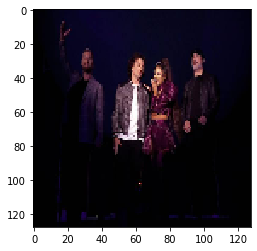

In [12]:
display_index = 80

plt.imshow(train_x_img[display_index]) # change index to whatever pic to see

In [ ]:
# below 2 lines actually needed - ONLY RUN ONCE
train_y_labels = np.expand_dims(train_y_labels, axis = 0)
test_y_labels = np.expand_dims(test_y_labels, axis = 0)

In [6]:
# troubleshooting, get rid of later

m_train = train_x_img.shape[0]
num_px = train_x_img.shape[1]
m_test = test_x_img.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_img shape: " + str(train_x_img.shape))
print ("train_y_labels shape: " + str(train_y_labels.shape))
print ("test_x_img shape: " + str(test_x_img.shape))
print ("test_y_labels shape: " + str(test_y_labels.shape))

Number of training examples: 844
Number of testing examples: 211
Each image is of size: (128, 128, 3)
train_x_img shape: (844, 128, 128, 3)
train_y_labels shape: (1, 844)
test_x_img shape: (211, 128, 128, 3)
test_y_labels shape: (1, 211)


In [10]:
# blessed, fixed issue

train_x_img = np.array(train_x_img)
train_y_labels = np.array(train_y_labels)
test_x_img = np.array(test_x_img)
test_y_labels = np.array(test_y_labels)

In [11]:
# Reshape the training and test examples 
train_x_flatten = train_x_img.reshape(train_x_img.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_img.reshape(test_x_img.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# results: 128 x 128 x 3 = 49152


train_x's shape: (49152, 844)
test_x's shape: (49152, 211)


In [14]:
train_x.shape[0]

49152

In [15]:
### CONSTANTS DEFINING THE MODEL ####
n_x = train_x.shape[0]     # num_px * num_px * 3
n_h = 7                 # size of the hidden layer
n_y = 1                    # size of output layer
layers_dims = (n_x, n_h, n_y)

In [16]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6925381622820085
Cost after iteration 100: 0.539530590510733
Cost after iteration 200: 0.3723482957136839
Cost after iteration 300: 0.3766898330331643
Cost after iteration 400: 0.3130264111657768
Cost after iteration 500: 0.28698118369646414
Cost after iteration 600: 0.2637309685285618
Cost after iteration 700: 0.24107078411291505
Cost after iteration 800: 0.22123721925248666
Cost after iteration 900: 0.1979542416977159
Cost after iteration 1000: 0.1399818648714005
Cost after iteration 1100: 0.10963976518430038
Cost after iteration 1200: 0.0924846739475423
Cost after iteration 1300: 0.08277361808339279
Cost after iteration 1400: 0.06664468492115934
Cost after iteration 1500: 0.05709934229219798
Cost after iteration 1600: 0.049523276204067726
Cost after iteration 1700: 0.04340416944046157
Cost after iteration 1800: 0.038502771732187385
Cost after iteration 1900: 0.03448257832823024
Cost after iteration 2000: 0.031092643180421018
Cost after iteration 2100: 0.028

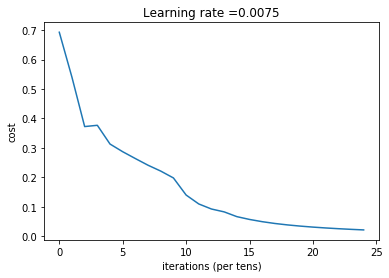

In [18]:
parameters = two_layer_model(train_x, train_y_labels, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [19]:
pred_train = predict(train_x, train_y_labels, parameters)

Accuracy: 0.9964454976303319


In [20]:
pred_test = predict(test_x, test_y_labels, parameters)

Accuracy: 0.8246445497630333
